In [1]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Listing 6.8 Processing the labels of the raw IMDB data

In [12]:
import os

imdb_dir = 'C:/Users/ibrar hussain mughal/Downloads/IMBD_DATA/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname) , encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
# Listing 6.9 Tokenizing the text of the raw IMDB data

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [15]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [16]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [18]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [19]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [20]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
# Listing 6.10 Parsing the GloVe word-embeddings file

In [24]:
glove_dir = 'C:/Users/ibrar hussain mughal/Downloads/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding ='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# Listing 6.11 Preparing the GloVe word-embeddings matrix

In [25]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
# Listing 6.12 Model definition

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Listing 6.13 Loading pretrained word embeddings into the Embedding layer

In [28]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
# TRAINING AND EVALUATING THE MODEL


In [29]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 3s 299ms/step - loss: 1.3572 - acc: 0.5300 - val_loss: 0.7377 - val_acc: 0.4999
Epoch 2/10
7/7 [==============================] - 1s 238ms/step - loss: 0.6065 - acc: 0.6550 - val_loss: 0.7061 - val_acc: 0.4928
Epoch 3/10
7/7 [==============================] - 1s 239ms/step - loss: 0.5108 - acc: 0.7750 - val_loss: 1.2996 - val_acc: 0.4984
Epoch 4/10
7/7 [==============================] - 1s 238ms/step - loss: 0.4989 - acc: 0.7250 - val_loss: 0.7547 - val_acc: 0.4988
Epoch 5/10
7/7 [==============================] - 1s 187ms/step - loss: 0.3349 - acc: 0.8650 - val_loss: 0.8628 - val_acc: 0.4997
Epoch 6/10
7/7 [==============================] - 1s 242ms/step - loss: 0.2411 - acc: 0.9400 - val_loss: 4.3579 - val_acc: 0.4983
Epoch 7/10
7/7 [==============================] - 1s 236ms/step - loss: 0.5979 - acc: 0.8650 - val_loss: 0.7964 - val_acc: 0.4995
Epoch 8/10
7/7 [==============================] - 1s 192ms/step - loss: 0.0711 - acc: 1.00

In [ ]:
# Listing 6.15 Plotting the results

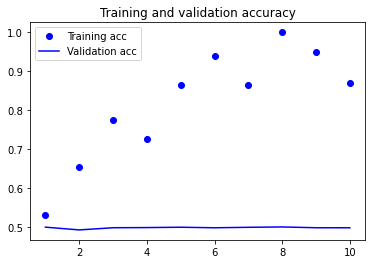

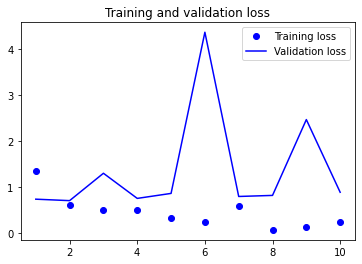

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Listing 6.16 Training the same model without pretrained word embeddings

In [31]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 264ms/step - loss: 0.6894 - acc: 0.5700 - val_loss: 0.6961 - val_acc: 0.4947
Epoch 2/10
7/7 [==============================] - 1s 231ms/step - loss: 0.4710 - acc: 0.9850 - val_loss: 0.7181 

In [ ]:
# Listing 6.15 Plotting the results

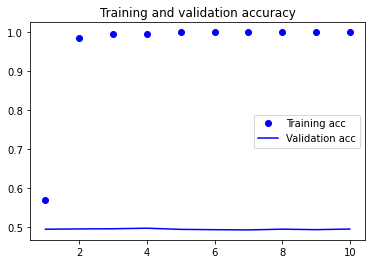

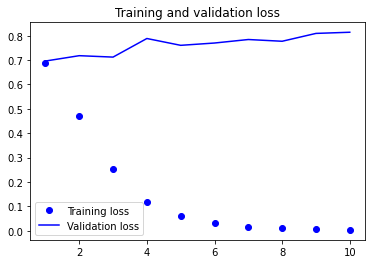

In [32]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Listing 6.17 Tokenizing the data of the test set

In [37]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding ='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [38]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
# Listing 6.18 Evaluating the model on the test set

In [40]:
model.load_weights('pre_trained_glove_model.h5')

In [41]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8794 - acc: 0.5038


[0.8793720602989197, 0.5037599802017212]